In [1]:
import pandas as pd
import requests
import json

In [ ]:
## Projeto:

## Viabilidade 

#http://www.abepro.org.br/biblioteca/TN_WIC_238_383_33513.pdf
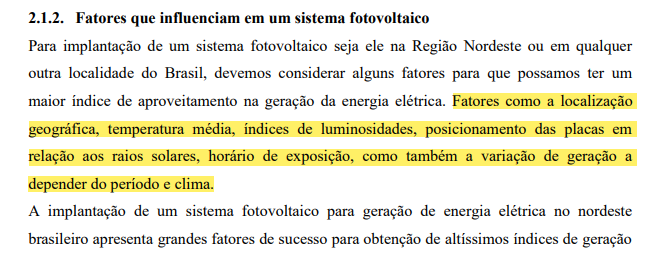

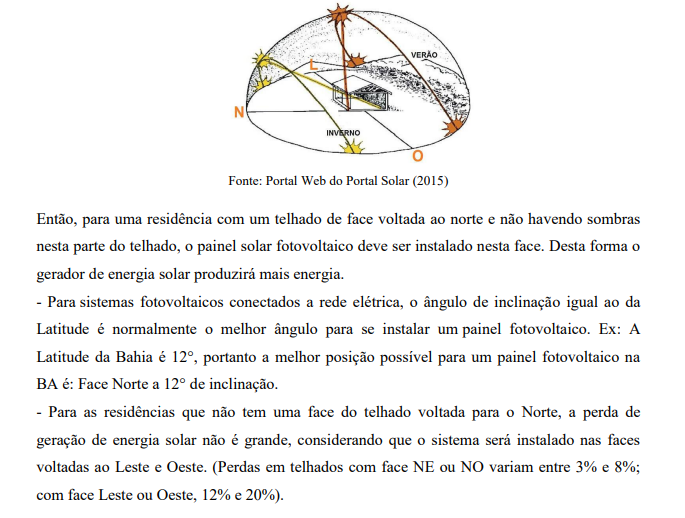

https://mapas.inmet.gov.br/

### No mapa.

Podemos separar algumas estações em localicades que poderiam ser mais diferente entre si pra verificar a diferença das variáveis.

Por exemplo: 

Pegando um ponto no litoral, como Bertioga.
Outro em Campos Jordão 
Presidente Prudente 
Jales
Ituverava
Bauru
Regitro

https://www.youtube.com/watch?v=zWcCy4WkfnA

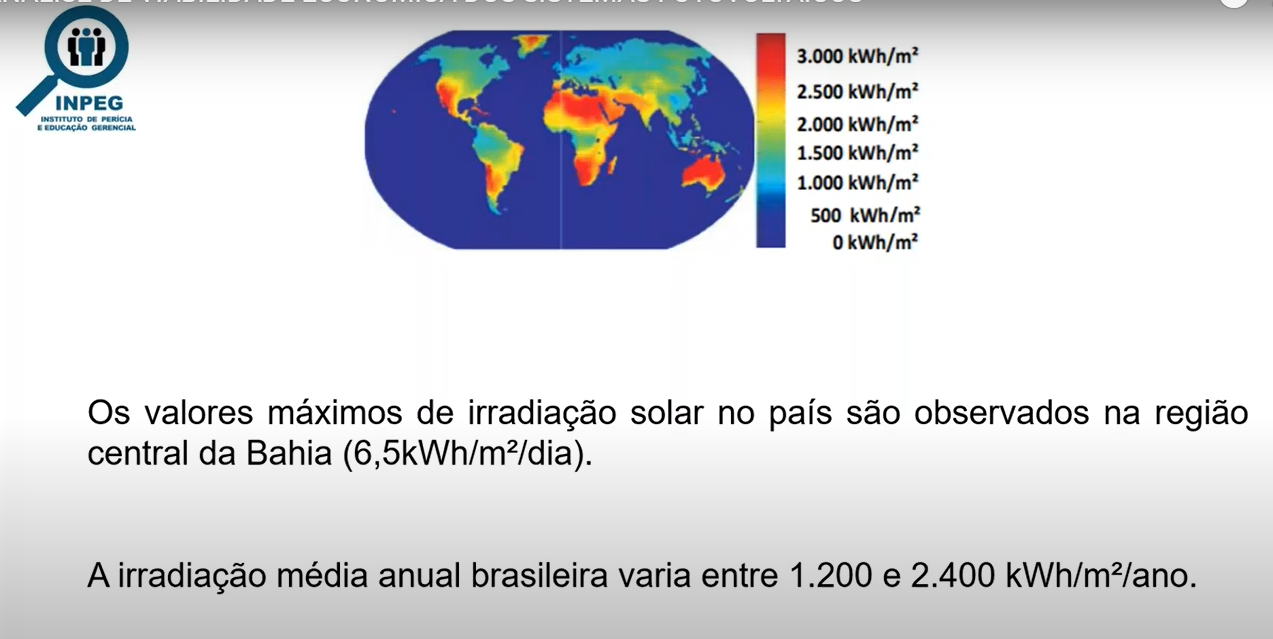

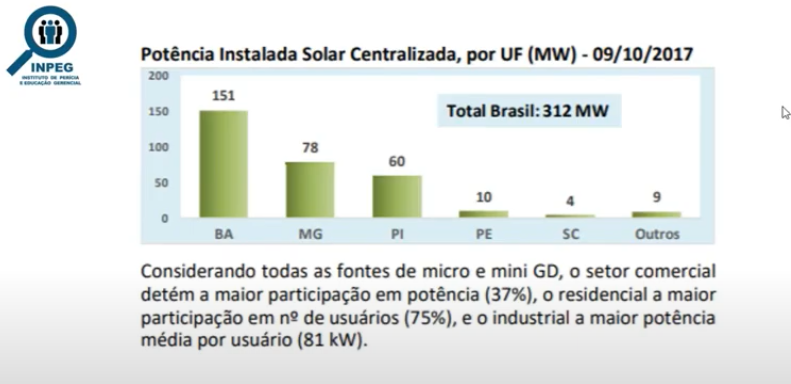

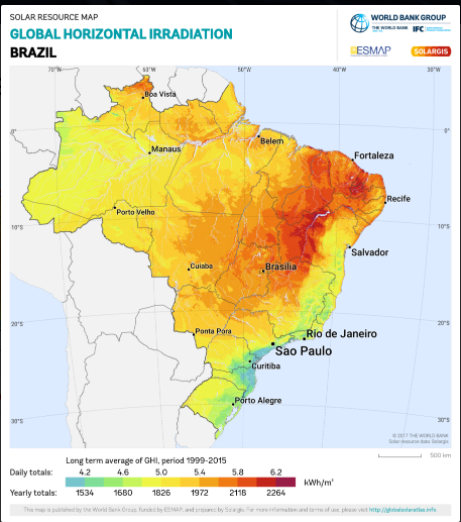

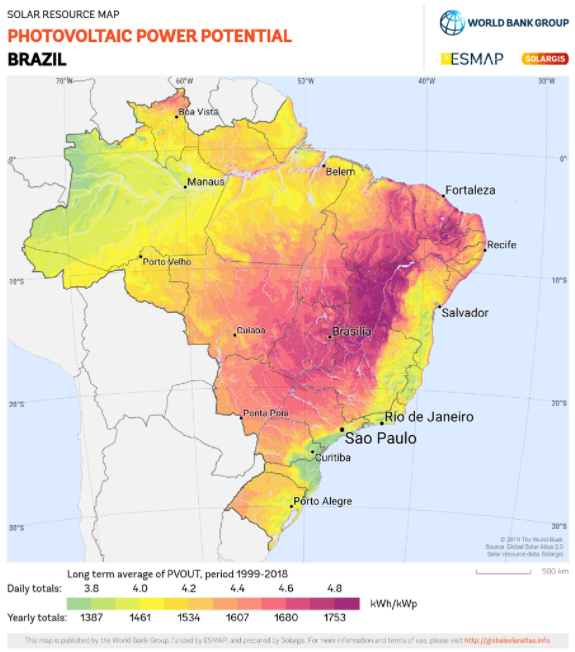

https://globalsolaratlas.info/download/brazil

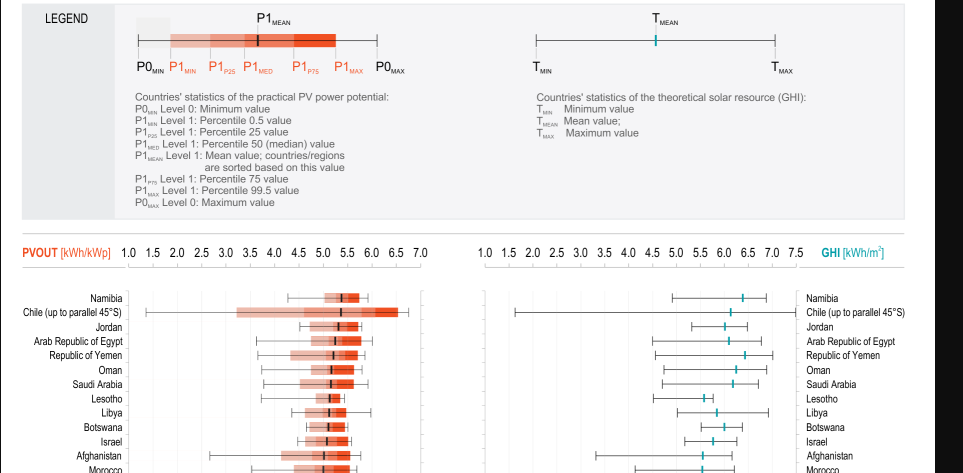

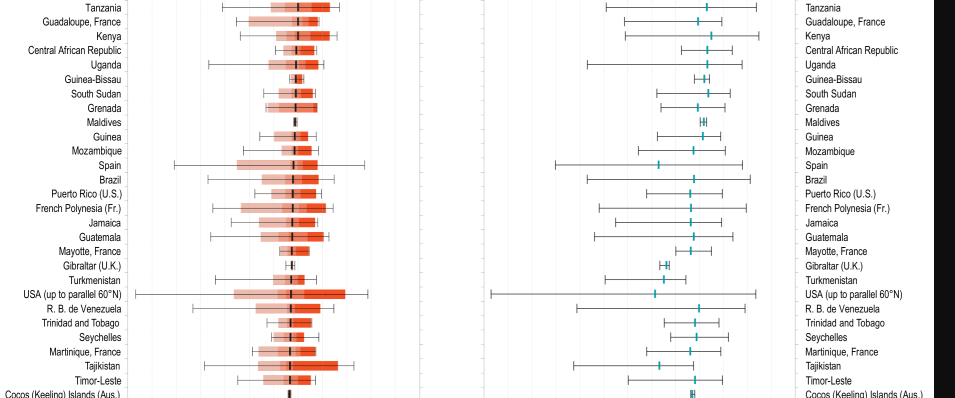

In [2]:
url=requests.get('https://apitempo.inmet.gov.br/estacoes/T')
x=url.json()
df=pd.read_json(json.dumps(x))
df.head(3)

,CD_OSCAR,DC_NOME,FL_CAPITAL,DT_FIM_OPERACAO,CD_SITUACAO,TP_ESTACAO,VL_LATITUDE,CD_WSI,CD_DISTRITO,VL_ALTITUDE,SG_ESTADO,SG_ENTIDADE,CD_ESTACAO,VL_LONGITUDE,DT_INICIO_OPERACAO
0,0-2000-0-86765,ABROLHOS,N,NaN,Pane,Automatica,-17.963056,0-76-0-2906907000000408,4,20.93,BA,INMET,A422,-38.703333,2008-07-20T21:00:00.000-03:00
1,0-2000-0-81755,ACARAU,N,NaN,Pane,Automatica,-3.121111,0-76-0-2300200000000446,3,67.15,CE,INMET,A360,-40.087222,2009-04-21T21:00:00.000-03:00
2,0-2000-0-86827,AFONSO CLAUDIO,None,NaN,Operante,Automatica,-20.104167,0-76-0-3200102000000478,6,507.48,ES,INMET,A657,-41.106944,2011-09-23T21:00:00.000-03:00


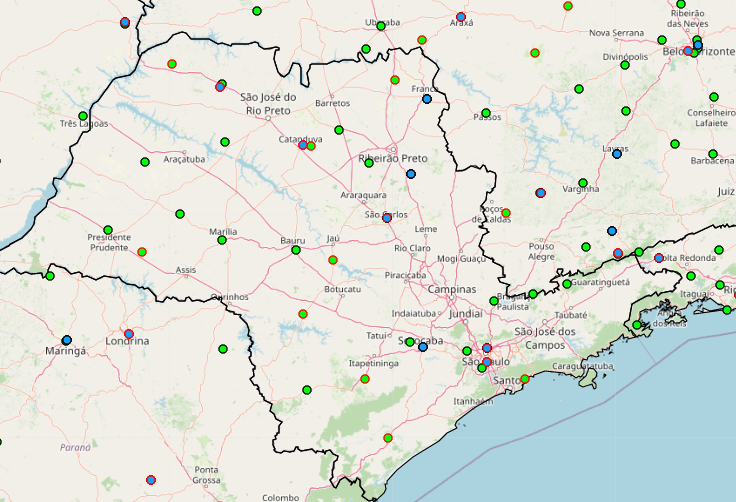
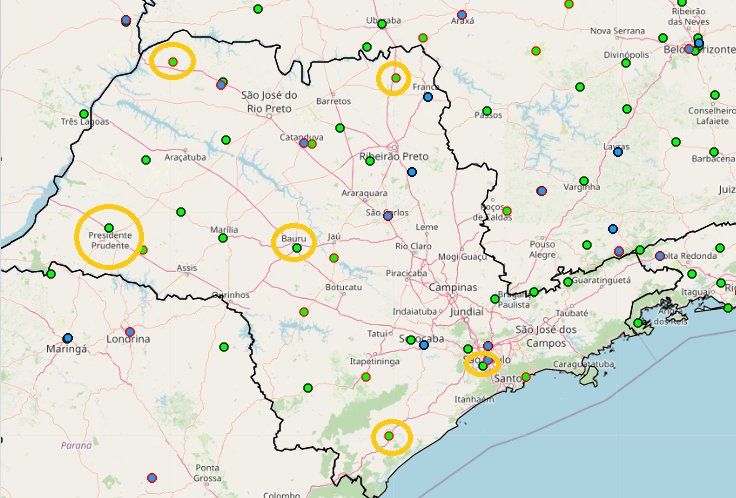

In [ ]:
LISTA_ESTACOES = ['JALES', 'SAO PAULO - INTERLAGOS', 'PRESIDENTE PRUDENTE', 'REGISTRO', 'BAURU', 'ITUVERAVA']

In [3]:
lista_estacoes = df.query('DC_NOME == "JALES"|DC_NOME == "SAO PAULO - INTERLAGOS"|DC_NOME == "PRESIDENTE PRUDENTE"|DC_NOME =="REGISTRO"|DC_NOME == "BAURU"|DC_NOME =="ITUVERAVA"')           
                
lista_estacoes = lista_estacoes.reset_index()

In [ ]:
'''mask_1 = df.age<1
mask_2 = df.age>10
mask_3 = df.male == 'M'
df.loc[(mask_1) | (mask_2) | (mask_3)]
'''

In [6]:
lista_estacoes = lista_estacoes[['DC_NOME','CD_ESTACAO','VL_LATITUDE','VL_ALTITUDE','VL_LONGITUDE']]

In [25]:
lista_estacoes

,DC_NOME,CD_ESTACAO,VL_LATITUDE,VL_ALTITUDE,VL_LONGITUDE
0,BAURU,A705,-22.358052,636.17,-49.028877
1,ITUVERAVA,A753,-20.359722,610.58,-47.775278
2,JALES,A733,-20.165000,460.44,-50.595000
3,PRESIDENTE PRUDENTE,A707,-22.119867,431.92,-51.408637
4,REGISTRO,A766,-24.533056,35.00,-47.864167
5,SAO PAULO - INTERLAGOS,A771,-23.724501,771.00,-46.677501


In [7]:
url=requests.get('https://apitempo.inmet.gov.br/estacao/diaria/2020-10-01/2020-10-31/A705')
x=url.json()
df_A705=pd.read_json(json.dumps(x))

Recuperar dados diários referentes a estação automática ou manual:


https://apitempo.inmet.gov.br/estacao/diaria/<data_inicial>/<data_final>/<cod_estacao>


https://apitempo.inmet.gov.br/estacao/diaria/2019-10-01/2019-10-31/A301


Sendo data no formato AAAA-MM-DD (ex: 2019-10-31

In [8]:
df_A705.head()

,UMID_MED,DT_MEDICAO,DC_NOME,UMID_MIN,TEMP_MED,CHUVA,VL_LATITUDE,TEMP_MIN,TEMP_MAX,UF,VEL_VENTO_MED,CD_ESTACAO,VL_LONGITUDE
0,41.5,2020-10-01,BAURU,14,30.2,0.0,-22.358052,20.9,40.1,SP,1.6,A705,-49.028877
1,28.1,2020-10-02,BAURU,14,32.1,0.0,-22.358052,23.8,40.3,SP,1.4,A705,-49.028877
2,37.7,2020-10-03,BAURU,19,30.4,0.0,-22.358052,25.6,38.3,SP,1.5,A705,-49.028877
3,59.8,2020-10-04,BAURU,31,25.7,0.0,-22.358052,19.5,35.1,SP,2.9,A705,-49.028877
4,55.4,2020-10-05,BAURU,20,26.9,0.0,-22.358052,18.9,38.5,SP,1.9,A705,-49.028877


Recuperar dados horários referentes a estação automática ou manual:

https://apitempo.inmet.gov.br/estacao/<data_inicial>/<data_final>/<cod_estacao>

https://apitempo.inmet.gov.br/estacao/2019-10-23/2019-10-23/A301

Sendo data no formato AAAA-MM-DD (ex: 2019-10-23)

In [9]:
url=requests.get('https://apitempo.inmet.gov.br/estacao/2020-01-01/2021-01-01/A705')
x=url.json()
df_A705=pd.read_json(json.dumps(x))

Pegando os dados de 01/01/2020 até 01/01/2021 por estação:

Primeiro Bauru:

In [10]:
df_A705.head()

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,...,PRE_MIN,UMD_MAX,VEN_VEL,PTO_MIN,TEM_MAX,VEN_RAJ,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,BAURU,938.0,25.4,-22.358052,938.1,SP,-3.340,19.9,23.9,-49.028877,...,937.5,78,1.0,17.5,26.0,7.1,24.1,77,A705,0
1,BAURU,938.7,26.0,-22.358052,938.7,SP,-3.075,19.3,24.1,-49.028877,...,937.9,77,0.4,18.0,25.3,5.3,24.6,73,A705,100
2,BAURU,938.4,24.9,-22.358052,938.7,SP,-3.519,19.0,23.3,-49.028877,...,938.4,77,0.0,18.4,24.8,2.7,23.3,77,A705,200
3,BAURU,938.0,24.1,-22.358052,938.4,SP,-3.540,19.1,22.4,-49.028877,...,938.0,81,0.0,18.6,23.3,0.9,22.4,81,A705,300
4,BAURU,937.9,24.6,-22.358052,938.0,SP,-3.382,19.0,22.1,-49.028877,...,937.9,82,0.0,18.6,23.2,1.4,23.1,77,A705,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,BAURU,941.1,27.4,-22.358052,941.3,SP,1164.934,20.7,25.8,-49.028877,...,940.7,74,0.0,20.0,29.1,0.0,25.8,73,A705,1900
8804,BAURU,941.3,23.8,-22.358052,941.5,SP,64.960,20.5,21.3,-49.028877,...,941.0,95,0.0,20.0,25.8,7.2,21.3,95,A705,2000
8805,BAURU,941.1,24.9,-22.358052,941.3,SP,442.089,21.3,21.1,-49.028877,...,940.7,96,0.0,20.2,22.3,0.0,22.3,94,A705,2100
8806,BAURU,941.3,24.2,-22.358052,941.4,SP,180.677,20.8,21.6,-49.028877,...,941.1,95,0.0,20.8,22.5,0.0,21.6,95,A705,2200


### Colunas escolhidas:

'DT_MEDICAO': Data medição,

'CHUVA': Precipitação Total, diário(aut) mm,

'DC_NOME': Nome DC, 

'RAD_GLO': RADIAÇÃO GLOBAL	W/m², 

'TEM_MAX':	TEMPERATURA MÁXIMA NA HORA ANT. (AUT)	°C,

'TEM_MIN':TEMPERATURA MÍNIMA NA HORA ANT. (AUT)	°C,

'UMD_INS': 	UMIDADE RELATIVA DO AR, HORARIA	%

In [11]:
lista_estacoes.DC_NOME.unique()

array(['BAURU', 'ITUVERAVA', 'JALES', 'PRESIDENTE PRUDENTE', 'REGISTRO',
       'SAO PAULO - INTERLAGOS'], dtype=object)

In [12]:
name = lista_estacoes.CD_ESTACAO.unique()
URL='https://apitempo.inmet.gov.br/estacao/2020-01-01/2021-01-01/{name}'
URL_ = URL.format(name = name[2])
url=requests.get(URL_)
print(URL_)
print(url)

https://apitempo.inmet.gov.br/estacao/2020-01-01/2021-01-01/A733
<Response [200]>


In [13]:
x=url.json()
df_A705=pd.read_json(json.dumps(x))

In [14]:
name

array(['A705', 'A753', 'A733', 'A707', 'A766', 'A771'], dtype=object)

In [15]:
URL='https://apitempo.inmet.gov.br/estacao/2020-01-01/2021-01-01/{name}'
URL_ = URL.format(name = name[1])
url=requests.get(URL_)
x=url.json()
df_A753 = pd.read_json(json.dumps(x))
df_A753.head(3)

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,...,PRE_MIN,UMD_MAX,VEN_VEL,PTO_MIN,TEM_MAX,VEN_RAJ,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,ITUVERAVA,940.6,22.9,-20.359722,941.0,SP,-3.077,20.2,21.9,-47.775278,...,940.4,90.0,1.7,20.0,22.7,6.0,22.0,89.0,A753,0
1,ITUVERAVA,941.5,23.6,-20.359722,941.5,SP,-3.248,20.4,21.4,-47.775278,...,940.5,92.0,0.9,19.9,22.4,4.0,21.6,92.0,A753,100
2,ITUVERAVA,941.7,23.6,-20.359722,941.9,SP,-2.566,20.1,21.6,-47.775278,...,941.5,93.0,1.0,20.1,21.8,2.3,21.7,91.0,A753,200


In [16]:
URL='https://apitempo.inmet.gov.br/estacao/2020-01-01/2021-01-01/{name}'
URL_ = URL.format(name = name[2])
url=requests.get(URL_)
x=url.json()
df_A733 = pd.read_json(json.dumps(x))
df_A733.head(3)

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,...,PRE_MIN,UMD_MAX,VEN_VEL,PTO_MIN,TEM_MAX,VEN_RAJ,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,JALES,957.0,24.0,-20.165,957.0,SP,-3.538,20.1,24.4,-50.595,...,956.0,74.0,3.1,17.7,25.4,5.9,25.2,73.0,A733,0
1,JALES,957.6,23.9,-20.165,957.6,SP,-3.539,20.6,23.9,-50.595,...,957.0,82.0,2.4,20.1,25.3,5.5,23.9,82.0,A733,100
2,JALES,958.0,25.4,-20.165,958.0,SP,-3.540,20.7,23.3,-50.595,...,957.5,85.0,0.8,20.5,23.9,3.5,23.5,84.0,A733,200


In [17]:
URL='https://apitempo.inmet.gov.br/estacao/2020-01-01/2021-01-01/{name}'
URL_ = URL.format(name = name[3])
url=requests.get(URL_)
x=url.json()
df_A707 = pd.read_json(json.dumps(x))
df_A707.head(3)

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,...,PRE_MIN,UMD_MAX,VEN_VEL,PTO_MIN,TEM_MAX,VEN_RAJ,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,PRESIDENTE PRUDENTE,958.4,30.7,-22.119867,958.4,SP,-3.540,17.4,30.4,-51.408637,...,957.8,45.0,0.6,16.3,31.0,3.9,30.6,45.0,A707,0
1,PRESIDENTE PRUDENTE,959.2,29.2,-22.119867,959.2,SP,-3.425,18.3,29.0,-51.408637,...,958.4,53.0,1.4,17.4,30.6,5.3,29.1,52.0,A707,100
2,PRESIDENTE PRUDENTE,959.5,28.6,-22.119867,959.5,SP,-3.278,18.4,28.0,-51.408637,...,959.2,56.0,0.7,18.3,29.1,4.6,28.0,56.0,A707,200


In [18]:
URL='https://apitempo.inmet.gov.br/estacao/2020-01-01/2021-01-01/{name}'
URL_ = URL.format(name = name[4])
url=requests.get(URL_)
x=url.json()
df_A766 = pd.read_json(json.dumps(x))
df_A766 .head(3)

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,...,PRE_MIN,UMD_MAX,VEN_VEL,PTO_MIN,TEM_MAX,VEN_RAJ,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,REGISTRO,NaN,NaN,-24.533056,NaN,SP,NaN,NaN,NaN,-47.864167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A766,0
1,REGISTRO,NaN,NaN,-24.533056,NaN,SP,NaN,NaN,NaN,-47.864167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A766,100
2,REGISTRO,NaN,NaN,-24.533056,NaN,SP,NaN,NaN,NaN,-47.864167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A766,200


In [19]:
URL='https://apitempo.inmet.gov.br/estacao/2020-01-01/2021-01-01/{name}'
URL_ = URL.format(name = name[5])
url=requests.get(URL_)
x=url.json()
df_A771 = pd.read_json(json.dumps(x))
df_A771.head(3)

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,...,PRE_MIN,UMD_MAX,VEN_VEL,PTO_MIN,TEM_MAX,VEN_RAJ,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,SÃO PAULO - INTERLAGOS,923.1,24.4,-23.724501,923.1,SP,-3.431,20.5,21.8,-46.677501,...,922.1,92.0,0.4,20.3,22.2,2.8,22.0,92.0,A771,0
1,SÃO PAULO - INTERLAGOS,923.7,24.2,-23.724501,923.7,SP,-3.107,20.7,22.0,-46.677501,...,923.1,92.0,0.9,20.4,22.3,1.8,22.1,92.0,A771,100
2,SÃO PAULO - INTERLAGOS,923.6,24.5,-23.724501,923.8,SP,-3.600,20.1,22.1,-46.677501,...,923.6,92.0,1.2,20.1,23.5,3.3,23.2,82.0,A771,200


In [20]:
lista_estacoes[['DC_NOME','CD_ESTACAO']]

,DC_NOME,CD_ESTACAO
0,BAURU,A705
1,ITUVERAVA,A753
2,JALES,A733
3,PRESIDENTE PRUDENTE,A707
4,REGISTRO,A766
5,SAO PAULO - INTERLAGOS,A771


In [21]:
DF_A705_ANUAL = df_A705[['DT_MEDICAO','CHUVA','DC_NOME','RAD_GLO', 'TEM_MAX','TEM_MIN','UMD_INS']]
DF_A753_ANUAL = df_A753[['DT_MEDICAO','CHUVA','DC_NOME','RAD_GLO', 'TEM_MAX','TEM_MIN','UMD_INS']]
DF_A733_ANUAL = df_A733[['DT_MEDICAO','CHUVA','DC_NOME','RAD_GLO', 'TEM_MAX','TEM_MIN','UMD_INS']]
DF_A707_ANUAL = df_A707[['DT_MEDICAO','CHUVA','DC_NOME','RAD_GLO', 'TEM_MAX','TEM_MIN','UMD_INS']]
DF_A766_ANUAL = df_A766[['DT_MEDICAO','CHUVA','DC_NOME','RAD_GLO', 'TEM_MAX','TEM_MIN','UMD_INS']]
DF_A771_ANUAL = df_A771[['DT_MEDICAO','CHUVA','DC_NOME','RAD_GLO', 'TEM_MAX','TEM_MIN','UMD_INS']]


In [23]:
DF_A705_ANUAL.describe()

,CHUVA,RAD_GLO,TEM_MAX,TEM_MIN,UMD_INS
count,6346.000000,6658.000000,6657.000000,6657.000000,6658.000000
mean,0.096470,1082.517434,26.187892,24.522593,59.525984
std,0.955952,1177.560721,5.419748,5.104056,23.159063
min,0.000000,-3.540000,9.000000,8.100000,8.000000
25%,0.000000,-3.479750,22.300000,21.300000,42.000000
50%,0.000000,621.952500,25.800000,24.100000,61.000000
75%,0.000000,2134.165250,30.300000,28.300000,78.000000
max,36.800000,4113.048000,42.000000,40.500000,99.000000


In [26]:
DF_A753_ANUAL.describe()

,CHUVA,RAD_GLO,TEM_MAX,TEM_MIN,UMD_INS
count,5924.000000,7521.000000,7511.000000,7511.000000,7521.000000
mean,0.174004,785.930708,23.485155,21.632885,66.321234
std,1.478513,1045.918458,6.284325,6.090322,23.195675
min,0.000000,-3.540000,3.800000,3.100000,11.000000
25%,0.000000,-3.540000,19.100000,17.300000,49.000000
50%,0.000000,52.771000,23.100000,21.400000,69.000000
75%,0.000000,1591.914000,28.500000,26.300000,88.000000
max,38.600000,4389.758000,41.400000,39.300000,98.000000


In [27]:
DF_A733_ANUAL.describe()

,CHUVA,RAD_GLO,TEM_MAX,TEM_MIN,UMD_INS
count,6346.000000,6658.000000,6657.000000,6657.000000,6658.000000
mean,0.096470,1082.517434,26.187892,24.522593,59.525984
std,0.955952,1177.560721,5.419748,5.104056,23.159063
min,0.000000,-3.540000,9.000000,8.100000,8.000000
25%,0.000000,-3.479750,22.300000,21.300000,42.000000
50%,0.000000,621.952500,25.800000,24.100000,61.000000
75%,0.000000,2134.165250,30.300000,28.300000,78.000000
max,36.800000,4113.048000,42.000000,40.500000,99.000000


In [24]:
DF_A707_ANUAL.describe()

,CHUVA,RAD_GLO,TEM_MAX,TEM_MIN,UMD_INS
count,8805.000000,8805.000000,8805.000000,8805.000000,8107.000000
mean,0.157888,580.023608,24.791448,23.553208,57.114839
std,1.353196,940.774687,5.223650,4.941345,20.207663
min,0.000000,-3.540000,7.800000,7.400000,10.000000
25%,0.000000,-3.537000,21.300000,20.300000,42.000000
50%,0.000000,18.737000,24.600000,23.400000,57.000000
75%,0.000000,791.670000,28.400000,26.800000,72.000000
max,38.600000,3963.486000,41.800000,40.700000,100.000000


In [28]:
DF_A766_ANUAL.describe()

,CHUVA,RAD_GLO,TEM_MAX,TEM_MIN,UMD_INS
count,131.000000,1268.000000,1252.000000,1252.000000,1257.000000
mean,0.003053,1925.528495,26.113259,24.206789,67.887033
std,0.024617,793.779964,4.549725,4.672529,14.422701
min,0.000000,164.996000,11.000000,7.500000,30.000000
25%,0.000000,1316.687750,23.200000,21.300000,58.000000
50%,0.000000,1888.613500,26.000000,24.100000,68.000000
75%,0.000000,2420.533750,29.100000,27.125000,78.000000
max,0.200000,4115.269000,42.800000,41.500000,100.000000


In [29]:
DF_A771_ANUAL.describe()

,CHUVA,RAD_GLO,TEM_MAX,TEM_MIN,UMD_INS
count,8805.000000,8806.000000,8806.000000,8806.000000,8800.000000
mean,0.145304,645.452029,20.022258,18.914127,81.548750
std,1.101891,961.592689,4.609651,4.125558,16.809506
min,0.000000,-3.600000,8.100000,7.800000,19.000000
25%,0.000000,-3.070750,16.900000,16.100000,72.000000
50%,0.000000,21.402500,19.500000,18.600000,88.000000
75%,0.000000,1119.882500,22.500000,21.200000,95.000000
max,37.600000,4000.613000,38.000000,37.100000,99.000000
